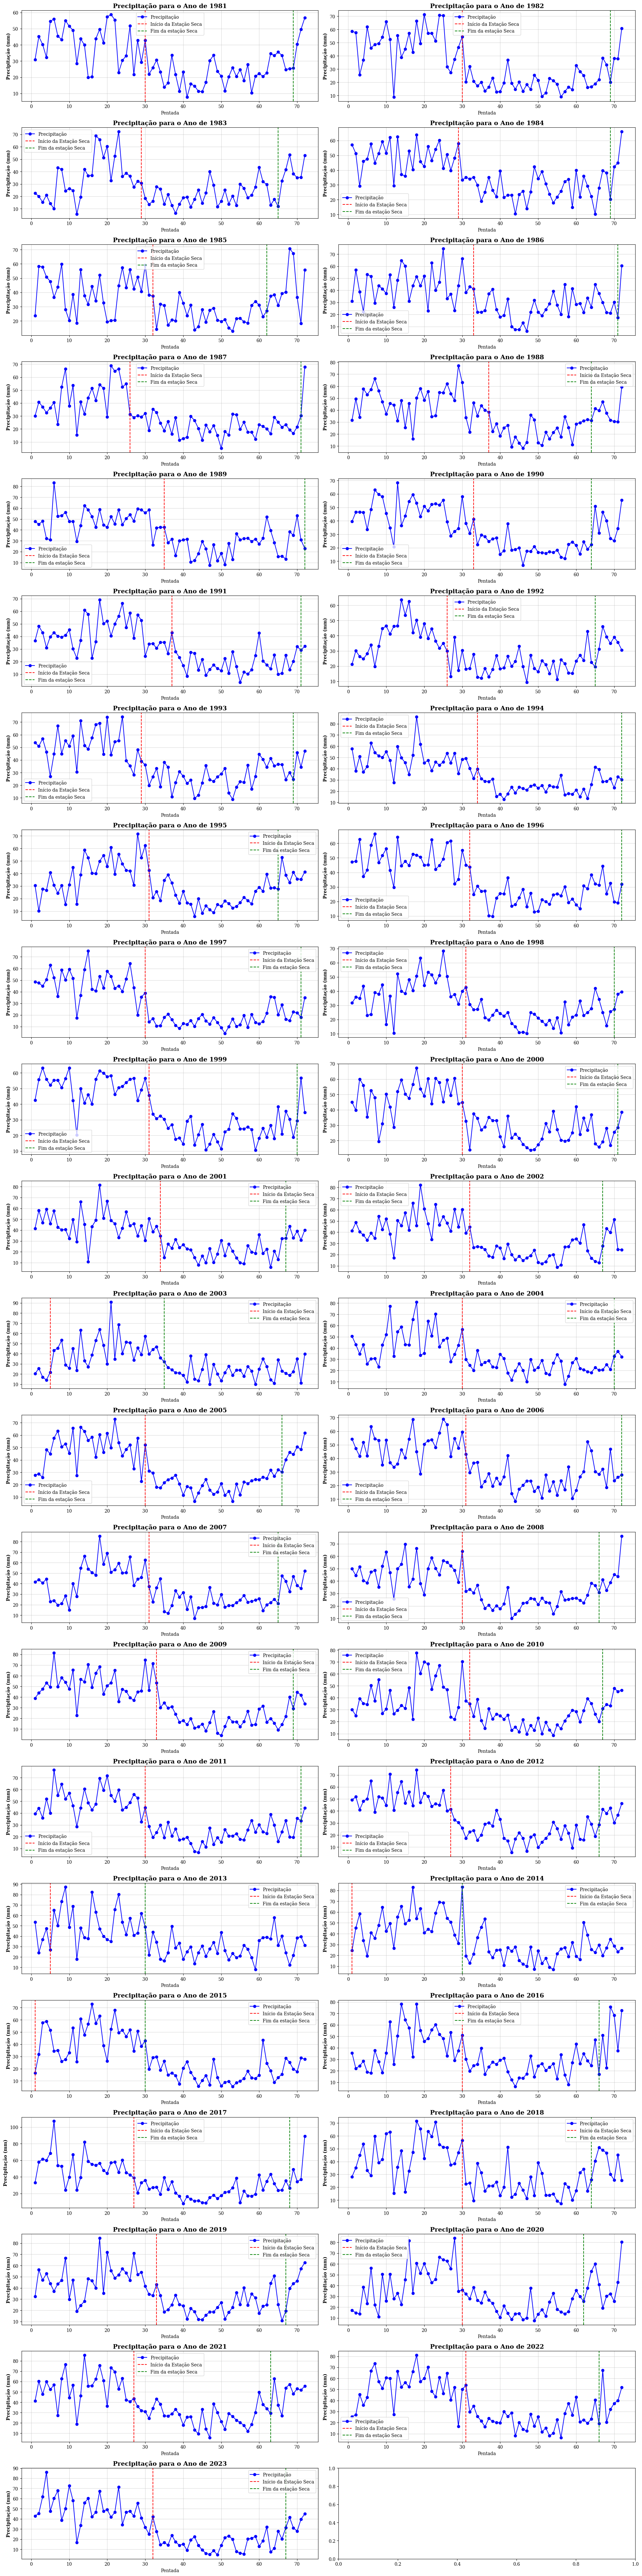

     Ano  Pentada_Início_Seca  Pentada_Fim_Seca  Duração_Seca
0   1981                   30                69            39
1   1982                   30                69            39
2   1983                   29                65            36
3   1984                   29                69            40
4   1985                   32                62            30
5   1986                   33                71            38
6   1987                   26                71            45
7   1988                   37                64            27
8   1989                   35                72            37
9   1990                   33                64            31
10  1991                   37                71            34
11  1992                   26                65            39
12  1993                   29                69            40
13  1994                   34                72            38
14  1995                   31                65            34
15  1996

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/AreaPreservada2.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 2023
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 2023)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 2024):  # Ajustado para incluir 2023
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Identificar os pontos de mudança em A_day (início e fim da estação seca)
    try:
        min_index = year_data["A_day"].idxmin()  # Índice do mínimo de A(day)
        max_index = year_data["A_day"].idxmax()  # Índice do máximo de A(day)

        # Garantir que o início (mínimo) vem antes do fim (máximo)
        if min_index < max_index:
            inicio_seca = year_data.loc[min_index, "Pentada"]
            fim_seca = year_data.loc[max_index, "Pentada"]
        else:
            inicio_seca = year_data.loc[max_index, "Pentada"]
            fim_seca = year_data.loc[min_index, "Pentada"]
    except IndexError:
        print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
        continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)


# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=22, ncols=2, figsize=(20, 80))  # Relacao de tamanho, por quantidade de graficos plotados 
axes = axes.flatten()

for i, year in enumerate(range(1981, 2024)):  # Ajustado para 2023
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o', color='blue')

    # Verificar se a coluna A_day existe antes de plotar
    if "A_day" in year_data.columns:
        # Plotar A(day)
        ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")
    else:
        ax.set_title(f"A coluna A_day não foi criada - {year}")
    
    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="red", linestyle="--", label="Início da Estação Seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da estação Seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação para o Ano de {year}", fontweight='bold', fontsize=14)
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Precipitação (mm)",  fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e salvar o gráfico em PDF
plt.tight_layout()
plt.show()
# Exibir as informações da estação seca
print(season_df)


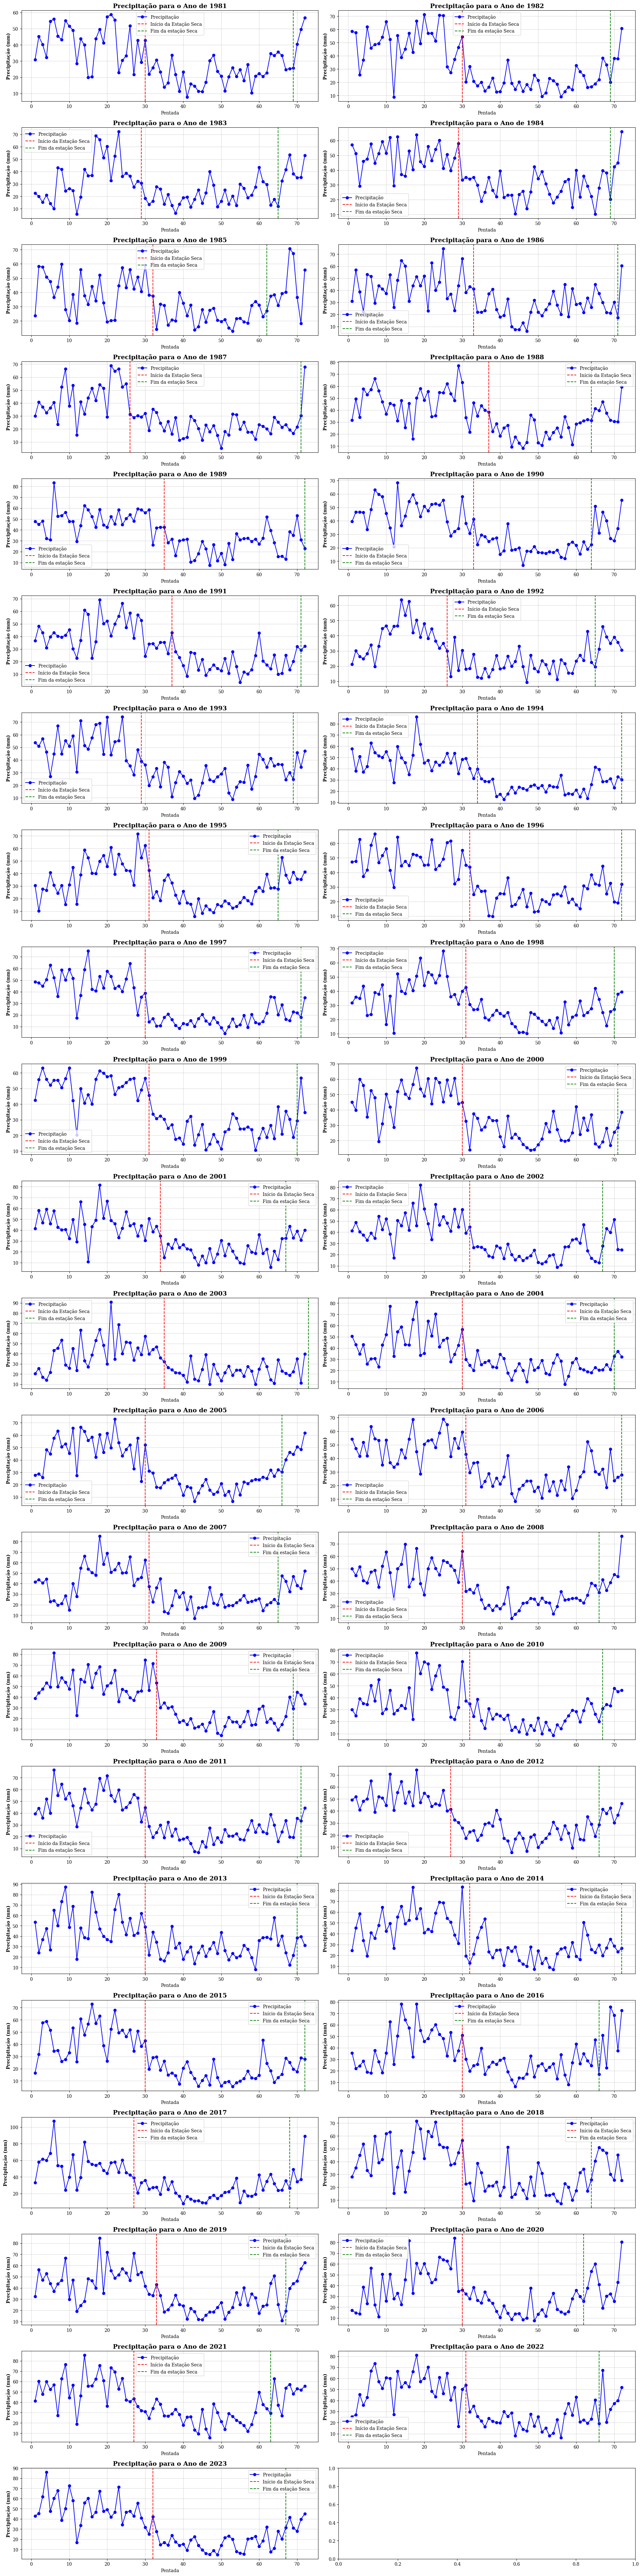

     Ano  Pentada_Início_Seca  Pentada_Fim_Seca  Duração_Seca
0   1981                   30                69            39
1   1982                   30                69            39
2   1983                   29                65            36
3   1984                   29                69            40
4   1985                   32                62            30
5   1986                   33                71            38
6   1987                   26                71            45
7   1988                   37                64            27
8   1989                   35                72            37
9   1990                   33                64            31
10  1991                   37                71            34
11  1992                   26                65            39
12  1993                   29                69            40
13  1994                   34                72            38
14  1995                   31                65            34
15  1996

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/AreaPreservada2.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 2023
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 2023)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 2024):  # Ajustado para incluir 2023
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Definir manualmente os períodos para os anos específicos
    if year == 2003:
        inicio_seca = 35
        fim_seca = 73
    elif year == 2013:
        inicio_seca = 30
        fim_seca = 70
    elif year == 2014:
        inicio_seca = 32
        fim_seca = 72
    elif year == 2015:
        inicio_seca = 30
        fim_seca = 72
    else:
        # Identificar os pontos de mudança em A_day (início e fim da estação seca)
        try:
            min_index = year_data["A_day"].idxmin()  # Índice do mínimo de A(day)
            max_index = year_data["A_day"].idxmax()  # Índice do máximo de A(day)

            # Garantir que o início (mínimo) vem antes do fim (máximo)
            if min_index < max_index:
                inicio_seca = year_data.loc[min_index, "Pentada"]
                fim_seca = year_data.loc[max_index, "Pentada"]
            else:
                inicio_seca = year_data.loc[max_index, "Pentada"]
                fim_seca = year_data.loc[min_index, "Pentada"]
        except IndexError:
            print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
            continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca if fim_seca and inicio_seca else None
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)

# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=22, ncols=2, figsize=(20, 80))  # Relacao de tamanho, por quantidade de graficos plotados 
axes = axes.flatten()

for i, year in enumerate(range(1981, 2024)):  # Ajustado para 2023
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o', color='blue')

    # Verificar se a coluna A_day existe antes de plotar
    if "A_day" in year_data.columns:
        # Plotar A(day)
        ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")
    else:
        ax.set_title(f"A coluna A_day não foi criada - {year}")
    
    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="red", linestyle="--", label="Início da Estação Seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da estação Seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação para o Ano de {year}", fontweight='bold', fontsize=14)
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Precipitação (mm)",  fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e salvar o gráfico em PDF
plt.tight_layout()
plt.show()

# Exibir as informações da estação seca
print(season_df)


In [9]:
# Cálculos estatísticos sobre a duração da estação seca
def analyze_season_data(season_df):
    # Duração média da estação seca
    mean_duration = season_df["Duração_Seca"].mean()

    # Duração mínima e máxima
    min_duration = season_df["Duração_Seca"].min()
    max_duration = season_df["Duração_Seca"].max()

    # Ano com menor e maior duração
    min_year = season_df.loc[season_df["Duração_Seca"].idxmin(), "Ano"]
    max_year = season_df.loc[season_df["Duração_Seca"].idxmax(), "Ano"]

    # Aumento percentual da duração ao longo dos anos
    initial_duration = season_df.iloc[0]["Duração_Seca"]
    final_duration = season_df.iloc[-1]["Duração_Seca"]
    percentage_change = ((final_duration - initial_duration) / initial_duration) * 100

    # Exibir resultados no terminal
    print("\n--- Análise da Duração da Estação Seca ---")
    print(f"Duração Média (pentadas): {mean_duration:.2f}")
    print(f"Duração Mínima (pentadas): {min_duration} (Ano: {min_year})")
    print(f"Duração Máxima (pentadas): {max_duration} (Ano: {max_year})")
    print(f"Aumento Percentual ao longo dos anos: {percentage_change:.2f}%\n")

    # Retornar os resultados (caso precise usá-los depois)
    return {
        "Duração Média (pentadas)": mean_duration,
        "Duração Mínima (pentadas)": min_duration,
        "Ano Mínimo": min_year,
        "Duração Máxima (pentadas)": max_duration,
        "Ano Máximo": max_year,
        "Aumento Percentual (%)": percentage_change
    }

# Realizar análises e exibir no terminal
analysis_results = analyze_season_data(season_df)




--- Análise da Duração da Estação Seca ---
Duração Média (pentadas): 37.12
Duração Mínima (pentadas): 27 (Ano: 1988)
Duração Máxima (pentadas): 45 (Ano: 1987)
Aumento Percentual ao longo dos anos: -10.26%




--- Análise de Regressão Linear ---
Equação da linha de tendência: Duração = -0.01 * Ano + 54.35
Inclinação (m): -0.01
Coeficiente de determinação (R²): 0.00


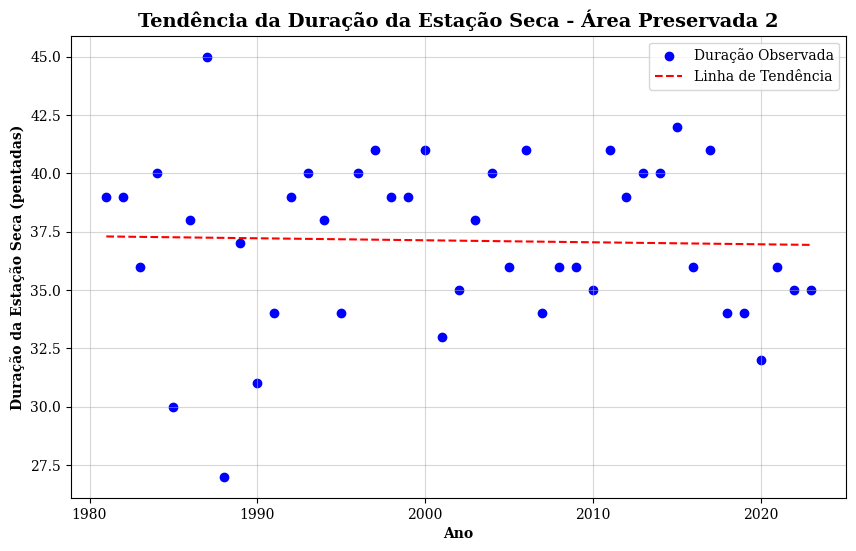

In [10]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados para análise
anos = season_df["Ano"]
duracao_seca = season_df["Duração_Seca"]

# Ajustar uma regressão linear (y = mx + b)
X = sm.add_constant(anos)  # Adiciona a constante (intercepto)
model = sm.OLS(duracao_seca, X).fit()  # Ajusta o modelo de regressão
trend_line = model.predict(X)  # Calcula a linha de tendência

# Coeficientes da regressão
coef_angular = model.params[1]  # Inclinação (m)
coef_intercepto = model.params[0]  # Intercepto (b)
r_squared = model.rsquared  # Coeficiente de determinação (qualidade do ajuste)

# Exibir resultados
print("\n--- Análise de Regressão Linear ---")
print(f"Equação da linha de tendência: Duração = {coef_angular:.2f} * Ano + {coef_intercepto:.2f}")
print(f"Inclinação (m): {coef_angular:.2f}")
print(f"Coeficiente de determinação (R²): {r_squared:.2f}")

# Plotar os dados e a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(anos, duracao_seca, color='blue', label="Duração Observada")
plt.plot(anos, trend_line, color='red', linestyle='--', label="Linha de Tendência")
plt.title("Tendência da Duração da Estação Seca - Área Preservada 2", fontweight='bold', fontsize=14)
plt.xlabel("Ano", fontweight='bold')
plt.ylabel("Duração da Estação Seca (pentadas)", fontweight='bold')
plt.legend()
plt.grid(alpha=0.5)
plt.show()



In [11]:
# Cálculos estatísticos sobre a duração da estação seca
def analyze_season_data(season_df):
    # Duração média da estação seca
    mean_duration = season_df["Duração_Seca"].mean()

    # Duração mínima e máxima
    min_duration = season_df["Duração_Seca"].min()
    max_duration = season_df["Duração_Seca"].max()

    # Ano com menor e maior duração
    min_year = season_df.loc[season_df["Duração_Seca"].idxmin(), "Ano"]
    max_year = season_df.loc[season_df["Duração_Seca"].idxmax(), "Ano"]

    # Aumento percentual da duração ao longo dos anos
    initial_duration = season_df.iloc[0]["Duração_Seca"]
    final_duration = season_df.iloc[-1]["Duração_Seca"]
    percentage_change = ((final_duration - initial_duration) / initial_duration) * 100

    # Exibir resultados no terminal
    print("\n--- Análise da Duração da Estação Seca ---")
    print(f"Duração Média (pentadas): {mean_duration:.2f}")
    print(f"Duração Mínima (pentadas): {min_duration} (Ano: {min_year})")
    print(f"Duração Máxima (pentadas): {max_duration} (Ano: {max_year})")
    print(f"Aumento Percentual ao longo dos anos: {percentage_change:.2f}%\n")

    # Retornar os resultados (caso precise usá-los depois)
    return {
        "Duração Média (pentadas)": mean_duration,
        "Duração Mínima (pentadas)": min_duration,
        "Ano Mínimo": min_year,
        "Duração Máxima (pentadas)": max_duration,
        "Ano Máximo": max_year,
        "Aumento Percentual (%)": percentage_change
    }

# Realizar análises e exibir no terminal
analysis_results = analyze_season_data(season_df)


--- Análise da Duração da Estação Seca ---
Duração Média (pentadas): 37.12
Duração Mínima (pentadas): 27 (Ano: 1988)
Duração Máxima (pentadas): 45 (Ano: 1987)
Aumento Percentual ao longo dos anos: -10.26%



NameError: name 'precipitation_df' is not defined

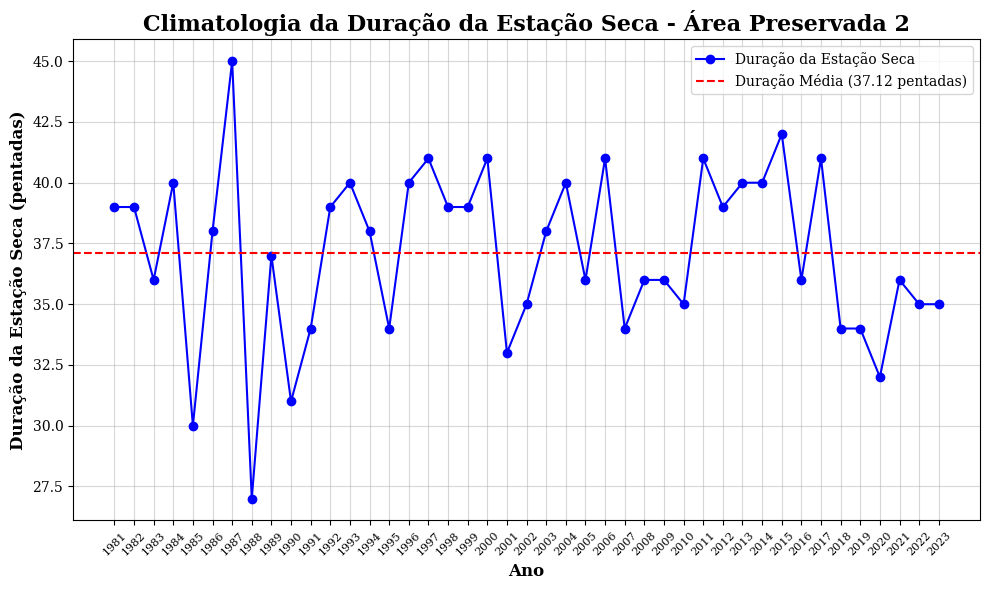

In [13]:
import matplotlib.pyplot as plt

# Função para plotar o gráfico
def plot_dry_season_duration(season_df):
    # Cálculo da duração média
    mean_duration = season_df["Duração_Seca"].mean()

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(season_df["Ano"], season_df["Duração_Seca"], label="Duração da Estação Seca",  color='blue', marker='o')
    plt.axhline(mean_duration, color='red', linestyle='--', label=f"Duração Média ({mean_duration:.2f} pentadas)")

    # Configurar título e rótulos
    plt.title("Climatologia da Duração da Estação Seca - Área Preservada 2", fontsize=16, fontweight='bold')
    plt.xlabel("Ano", fontsize=12, fontweight='bold')
    plt.ylabel("Duração da Estação Seca (pentadas)", fontsize=12, fontweight='bold')
    plt.xticks(season_df["Ano"], rotation=45, fontsize=8)
    plt.grid(alpha=0.5)

    # Legenda
    plt.legend()
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar
plot_dry_season_duration(season_df)


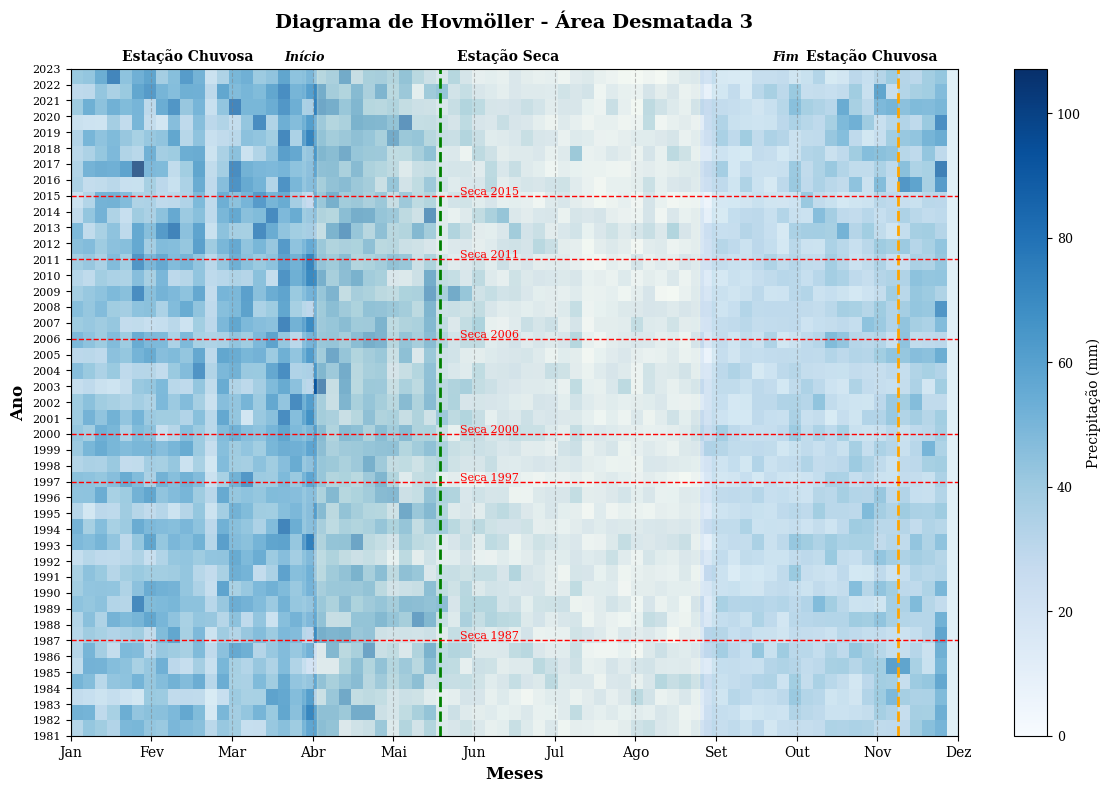

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Dados necessários (simulados)
anos = season_df["Ano"]
inicio_seca = season_df["Pentada_Início_Seca"]
fim_seca = season_df["Pentada_Fim_Seca"]

duracao_seca = fim_seca - inicio_seca

# Criar matriz para o diagrama de Hovmöller usando precipitação (valores simulados para exemplo)
hovmoller_matrix = np.zeros((len(anos), 73))  # 73 pentadas em um ano

# Preenchendo a matriz com dados de precipitação
for i, year in enumerate(anos):
    year_data = df_filtered[df_filtered["Ano"] == year]
    for pentada in year_data["Pentada"]:
        hovmoller_matrix[i, pentada - 1] = year_data.loc[year_data["Pentada"] == pentada, "Precipitação"].values[0]

# Calcular os valores médios de início e fim da estação seca
inicio_seca_medio = inicio_seca.mean()
fim_seca_medio = fim_seca.mean()

# Identificar os anos com maior duração da estação seca
top_duracao_indices = duracao_seca.nlargest(6).index
seca_anos = anos[top_duracao_indices]
seca_pentadas = [35] * len(seca_anos)  # Exemplo: linha em pentada 35

# Configurações do gráfico
plt.figure(figsize=(12, 8))
plt.imshow(
    hovmoller_matrix,
    aspect="auto",
    cmap="Blues",  # Gradiente de azul
    origin="lower",
    extent=[1, 73, anos.min(), anos.max()],
)

# Adicionando áreas para estações seca e chuvosa
plt.axvspan(1, 20, color="lightblue", alpha=0.3)
plt.axvspan(21, 52, color="lightyellow", alpha=0.3)
plt.axvspan(53, 73, color="lightblue", alpha=0.3)

# Adicionar texto para identificar as estações
plt.text(10.5, anos.max() + 0.5, "Estação Chuvosa", fontsize=10, ha="center", fontweight="bold")
plt.text(36.5, anos.max() + 0.5, "Estação Seca", fontsize=10, ha="center", fontweight="bold")
plt.text(66, anos.max() + 0.5, "Estação Chuvosa", fontsize=10, ha="center", fontweight="bold")
plt.text(20, anos.max() + 0.5, "Início", fontsize=9, ha="center", fontweight="bold", style="italic")
plt.text(59, anos.max() + 0.5, "Fim", fontsize=9, ha="center", fontweight="bold", style="italic")

# Adicionar linhas tracejadas para o início e fim médio da estação seca
plt.axvline(x=inicio_seca_medio, color="green", linestyle="--", linewidth=2, label="Início Médio da Estação Seca")
plt.axvline(x=fim_seca_medio, color="orange", linestyle="--", linewidth=2, label="Fim Médio da Estação Seca")

# Marcar eventos de seca com linhas e anotações
for ano, pentada in zip(seca_anos, seca_pentadas):
    plt.axhline(y=ano, color="red", linestyle="--", linewidth=1)
    plt.text(
        pentada,
        ano + 0.1,
        f"Seca {ano}",
        color="red",
        fontsize=8,
        ha="center",
        #bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"),
    )

# Barra de cores e rótulos
cbar = plt.colorbar(label="Precipitação (mm)")
cbar.ax.tick_params(labelsize=9)
plt.title(
    "Diagrama de Hovmöller - Área Desmatada 3",
    fontsize=14,
    fontweight="bold",
    y=1.05
)
plt.xlabel("Meses", fontsize=12, fontweight="bold")
plt.ylabel("Ano", fontsize=12, fontweight="bold")
plt.xticks(ticks=np.linspace(1, 73, num=12), labels=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"], fontsize=10)
#plt.yticks(ticks=anos, labels=anos, fontsize=10)
plt.yticks(ticks=anos, labels=anos, fontsize=8)

plt.grid(axis="x", color="gray", linestyle="--", alpha=0.5)

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()



--- Análise de Regressão Linear ---
Equação da linha de tendência: Duração = -0.01 * Ano + 54.35
Inclinação (m): -0.01
Coeficiente de determinação (R²): 0.00


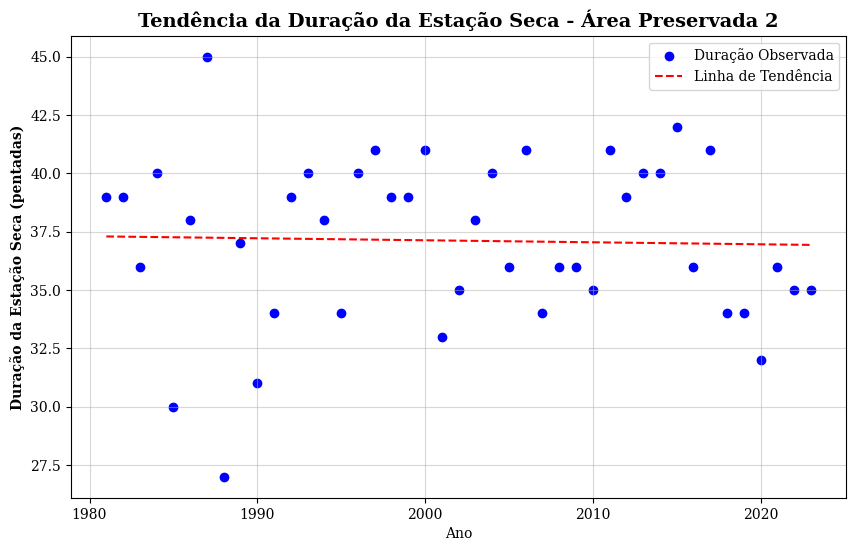

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados para análise
anos = season_df["Ano"]
duracao_seca = season_df["Duração_Seca"]

# Ajustar uma regressão linear (y = mx + b)
X = sm.add_constant(anos)  # Adiciona a constante (intercepto)
model = sm.OLS(duracao_seca, X).fit()  # Ajusta o modelo de regressão
trend_line = model.predict(X)  # Calcula a linha de tendência

# Coeficientes da regressão
coef_angular = model.params[1]  # Inclinação (m)
coef_intercepto = model.params[0]  # Intercepto (b)
r_squared = model.rsquared  # Coeficiente de determinação (qualidade do ajuste)

# Exibir resultados
print("\n--- Análise de Regressão Linear ---")
print(f"Equação da linha de tendência: Duração = {coef_angular:.2f} * Ano + {coef_intercepto:.2f}")
print(f"Inclinação (m): {coef_angular:.2f}")
print(f"Coeficiente de determinação (R²): {r_squared:.2f}")

# Criar um DataFrame com os resultados para exportação
resultados = pd.DataFrame({
    "Ano": anos,
    "Duração Observada": duracao_seca,
    "Linha de Tendência": trend_line
})

# Salvar os dados no Excel
resultados.to_excel("dados_analise_area_preservada2.xlsx", index=False)

# Plotar os dados e a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(anos, duracao_seca, color='blue', label="Duração Observada")
plt.plot(anos, trend_line, color='red', linestyle='--', label="Linha de Tendência")
plt.title("Tendência da Duração da Estação Seca - Área Preservada 2", fontweight='bold', fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Duração da Estação Seca (pentadas)", fontweight='bold')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [20]:
# Função para analisar os dados de precipitação
def analyze_precipitation_data(precipitation_df):
    # Precipitação média anual
    mean_precipitation = precipitation_df["Precipitação Média Anual"].mean()

    # Precipitação mínima e máxima e os respectivos anos
    min_precipitation = precipitation_df["Precipitação Média Anual"].min()
    max_precipitation = precipitation_df["Precipitação Média Anual"].max()
    min_year = precipitation_df.loc[precipitation_df["Precipitação Média Anual"].idxmin(), "Ano"]
    max_year = precipitation_df.loc[precipitation_df["Precipitação Média Anual"].idxmax(), "Ano"]

    # Variação percentual ao longo do tempo
    initial_precipitation = precipitation_df.iloc[0]["Precipitação Média Anual"]
    final_precipitation = precipitation_df.iloc[-1]["Precipitação Média Anual"]
    percentage_change = ((final_precipitation - initial_precipitation) / initial_precipitation) * 100

    # Criar um DataFrame com os resultados formatados
    analysis_results = pd.DataFrame({
        "Métrica": [
            "Precipitação Média Anual (mm)",
            "Precipitação Mínima (mm) (Ano)",
            "Precipitação Máxima (mm) (Ano)",
            "Variação Percentual ao longo dos anos (%)"
        ],
        "Valor": [
            f"{mean_precipitation:.2f}",
            f"{min_precipitation:.2f} ({min_year})",
            f"{max_precipitation:.2f} ({max_year})",
            f"{percentage_change:.2f}%"
        ]
    })

    return analysis_results

# Realizar a análise de precipitação
precipitation_analysis = analyze_precipitation_data(precipitation_df)

# Exibir o DataFrame de resultados
print(precipitation_analysis)

# Salvar os resultados em Excel, se necessário
#precipitation_analysis.to_excel("precipitation_analysis_summary.xlsx", index=False)

KeyError: 'Precipitação Média Anual'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import statsmodels.api as sm

rcParams['font.family'] = 'serif'

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/AreaPreservada2.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 2023
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 2023)]

# Criar precipitation_df baseado nos dados filtrados
precipitation_df = df_filtered.groupby("Ano")["Precipitação"].sum().reset_index()
precipitation_df.rename(columns={"Precipitação": "Total_Precipitação"}, inplace=True)

# Função para análise de precipitação
def analyze_precipitation_data(precipitation_df):
    # Precipitação média anual
    mean_precipitation = precipitation_df["Total_Precipitação"].mean()

    # Precipitação mínima e máxima
    min_precipitation = precipitation_df["Total_Precipitação"].min()
    max_precipitation = precipitation_df["Total_Precipitação"].max()

    # Ano com menor e maior precipitação
    min_year = precipitation_df.loc[precipitation_df["Total_Precipitação"].idxmin(), "Ano"]
    max_year = precipitation_df.loc[precipitation_df["Total_Precipitação"].idxmax(), "Ano"]

    # Aumento percentual da precipitação ao longo dos anos
    initial_precipitation = precipitation_df.iloc[0]["Total_Precipitação"]
    final_precipitation = precipitation_df.iloc[-1]["Total_Precipitação"]
    percentage_change = ((final_precipitation - initial_precipitation) / initial_precipitation) * 100

    # Exibir resultados no terminal
    print("\n--- Análise da Precipitação Anual ---")
    print(f"Precipitação Média Anual (mm): {mean_precipitation:.2f}")
    print(f"Precipitação Mínima Anual (mm): {min_precipitation} (Ano: {min_year})")
    print(f"Precipitação Máxima Anual (mm): {max_precipitation} (Ano: {max_year})")
    print(f"Aumento Percentual ao longo dos anos: {percentage_change:.2f}%\n")

    # Retornar os resultados
    return {
        "Precipitação Média Anual (mm)": mean_precipitation,
        "Precipitação Mínima Anual (mm)": min_precipitation,
        "Ano Mínimo": min_year,
        "Precipitação Máxima Anual (mm)": max_precipitation,
        "Ano Máximo": max_year,
        "Aumento Percentual (%)": percentage_change
    }

# Realizar a análise de precipitação
precipitation_analysis = analyze_precipitation_data(precipitation_df)

# Exibir o DataFrame de resultados
print(precipitation_analysis)



--- Análise da Precipitação Anual ---
Precipitação Média Anual (mm): 2448.08
Precipitação Mínima Anual (mm): 2040.0513225221803 (Ano: 1983)
Precipitação Máxima Anual (mm): 2875.260083669809 (Ano: 2021)
Aumento Percentual ao longo dos anos: 3.24%

{'Precipitação Média Anual (mm)': 2448.077687582745, 'Precipitação Mínima Anual (mm)': 2040.0513225221803, 'Ano Mínimo': 1983, 'Precipitação Máxima Anual (mm)': 2875.260083669809, 'Ano Máximo': 2021, 'Aumento Percentual (%)': 3.2369256458733697}


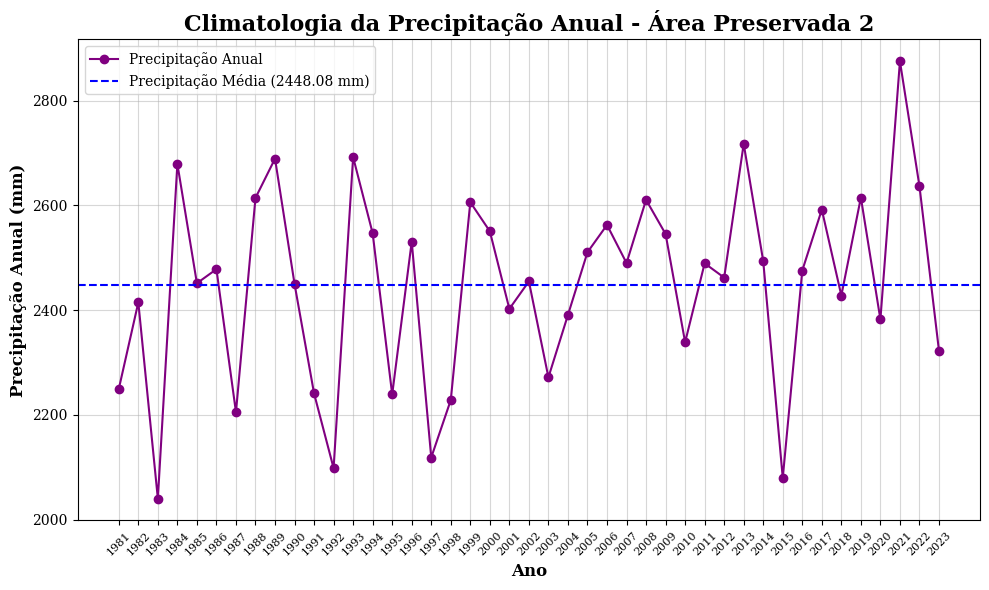

In [21]:
import matplotlib.pyplot as plt

# Função para plotar o gráfico
def plot_precipitation_trend(precipitation_df):
    # Cálculo da precipitação média anual
    mean_precipitation = precipitation_df["Total_Precipitação"].mean()

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(precipitation_df["Ano"], precipitation_df["Total_Precipitação"], label="Precipitação Anual", color='purple', marker='o')
    plt.axhline(mean_precipitation, color='blue', linestyle='--', label=f"Precipitação Média ({mean_precipitation:.2f} mm)")

    # Configurar título e rótulos
    plt.title("Climatologia da Precipitação Anual - Área Preservada 2", fontsize=16, fontweight='bold')
    plt.xlabel("Ano", fontsize=12, fontweight='bold')
    plt.ylabel("Precipitação Anual (mm)", fontsize=12, fontweight='bold')
    plt.xticks(precipitation_df["Ano"], rotation=45, fontsize=8)
    plt.grid(alpha=0.5)

    # Legenda
    plt.legend()
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar
plot_precipitation_trend(precipitation_df)


NameError: name 'projecao_df' is not defined

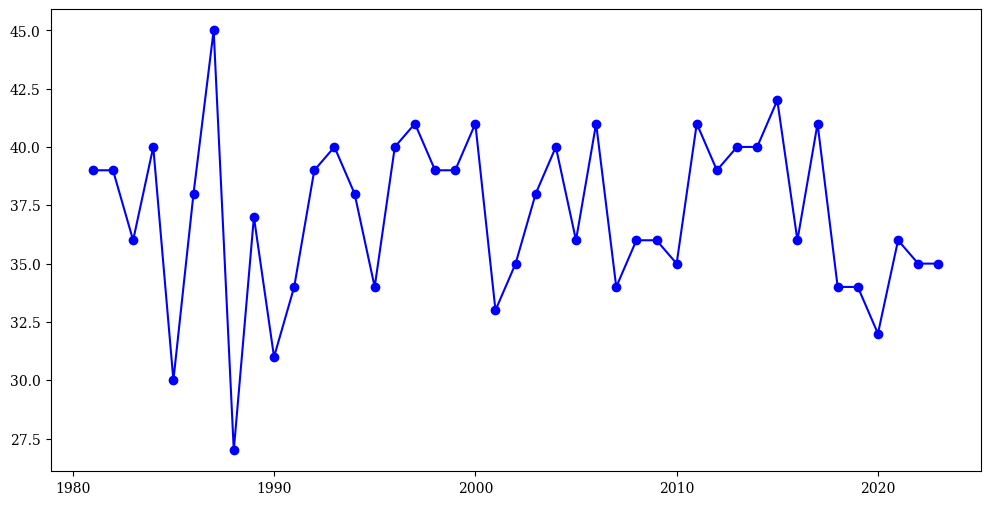

In [22]:
import matplotlib.pyplot as plt

# Ajustar os dados do gráfico para refinar a estética
plt.figure(figsize=(12, 6))

# Dados históricos
plt.plot(season_df["Ano"], season_df["Duração_Seca"], marker="o", label="Duração Histórica", color="blue")

# Projeções
plt.plot(projecao_df["Ano"], projecao_df["Duração_Seca_Projetada"], marker="o", markersize=8, linestyle="--", label="Projeção", color="red")

# Linha horizontal para a média histórica
plt.axhline(mean_duration, color='green', linestyle='--', linewidth=2, label=f"Duração Média ({mean_duration:.2f} pentadas)")

# Ajustar o eixo X para mostrar todos os anos
plt.xticks(ticks=season_df["Ano"].tolist() + projecao_df["Ano"].tolist(), rotation=45, fontsize=8)

# Ajuste de escala do eixo Y
plt.ylim(30, 55)

# Configurações do gráfico
plt.title("Projeção da Duração da Estação Seca (1981–2038)", fontweight="bold", fontsize=14)
plt.xlabel("Ano", fontsize=12, fontweight="bold")
plt.ylabel("Duração da Estação Seca (Pentadas)", fontsize=12, fontweight="bold")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(alpha=0.5)

# Anotação para destacar início das projeções
plt.annotate("Início das Projeções", xy=(2024, projecoes[0]), xytext=(2015, 50),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)

# Salvar e exibir o gráfico
plt.savefig(output_path_projection, format="pdf")
plt.show()


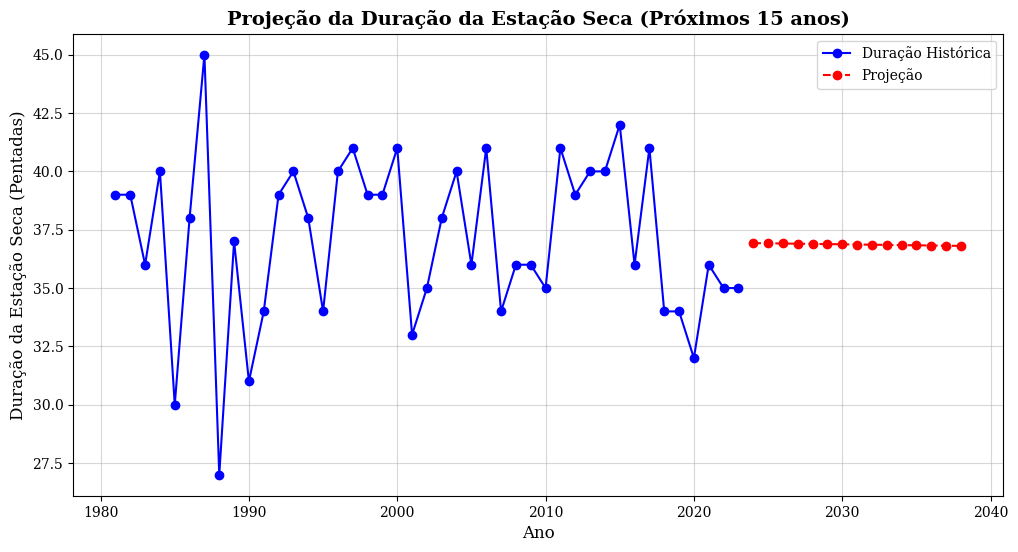

     Ano  Duração_Seca_Projetada
0   2024               36.926910
1   2025               36.918303
2   2026               36.909695
3   2027               36.901087
4   2028               36.892480
5   2029               36.883872
6   2030               36.875264
7   2031               36.866657
8   2032               36.858049
9   2033               36.849441
10  2034               36.840834
11  2035               36.832226
12  2036               36.823618
13  2037               36.815011
14  2038               36.806403


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams

# Configuração de fonte para o gráfico
rcParams['font.family'] = 'serif'

# Carregar os dados históricos
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/AreaPreservada2.xlsx'
df = pd.read_excel(amazonia)

# Dados sobre duração da estação seca já calculados previamente
# Assumindo que você já gerou o DataFrame season_df com as colunas ["Ano", "Duração_Seca"]

# Separar os dados de entrada (Ano) e saída (Duração_Seca)
X = season_df["Ano"].values.reshape(-1, 1)  # Transformar em matriz para o modelo
y = season_df["Duração_Seca"].values

# Criar e ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Gerar projeções para os próximos 15 anos (2024 a 2038)
anos_futuros = np.arange(2024, 2039).reshape(-1, 1)  # Anos de 2024 a 2038
projecoes = modelo.predict(anos_futuros)

# Combinar anos futuros e projeções em um DataFrame
projecao_df = pd.DataFrame({
    "Ano": anos_futuros.flatten(),
    "Duração_Seca_Projetada": projecoes
})

# Plotar a duração da estação seca (histórico + projeções)
plt.figure(figsize=(12, 6))

# Dados históricos
plt.plot(season_df["Ano"], season_df["Duração_Seca"], marker="o", label="Duração Histórica", color="blue")

# Projeções
plt.plot(projecao_df["Ano"], projecao_df["Duração_Seca_Projetada"], marker="o", linestyle="--", label="Projeção", color="red")

# Configurações do gráfico
plt.title("Projeção da Duração da Estação Seca (Próximos 15 anos)", fontweight="bold", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Duração da Estação Seca (Pentadas)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)


# Exibir o gráfico
plt.show()

# Exibir projeções
print(projecao_df)

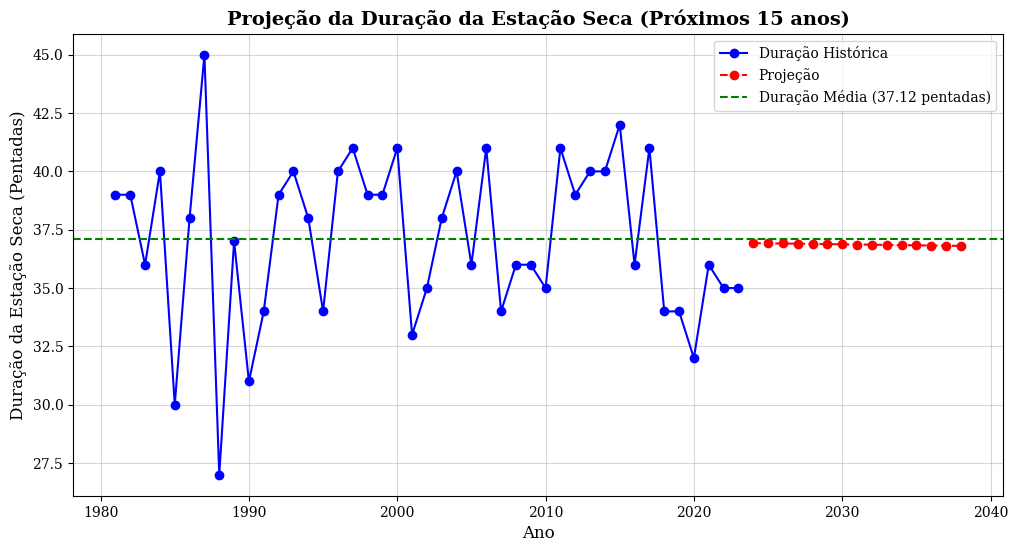

     Ano  Duração_Seca_Projetada
0   2024               36.926910
1   2025               36.918303
2   2026               36.909695
3   2027               36.901087
4   2028               36.892480
5   2029               36.883872
6   2030               36.875264
7   2031               36.866657
8   2032               36.858049
9   2033               36.849441
10  2034               36.840834
11  2035               36.832226
12  2036               36.823618
13  2037               36.815011
14  2038               36.806403


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import rcParams

# Configuração de fonte para o gráfico
rcParams['font.family'] = 'serif'

# Dados sobre duração da estação seca já calculados previamente
# Assumindo que você já gerou o DataFrame `season_df` com as colunas ["Ano", "Duração_Seca"]

# Calcular a média da duração histórica da estação seca
mean_duration = season_df["Duração_Seca"].mean()

# Separar os dados de entrada (Ano) e saída (Duração_Seca)
X = season_df["Ano"].values.reshape(-1, 1)  # Transformar em matriz para o modelo
y = season_df["Duração_Seca"].values

# Criar e ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Gerar projeções para os próximos 15 anos (2024 a 2038)
anos_futuros = np.arange(2024, 2039).reshape(-1, 1)  # Anos de 2024 a 2038
projecoes = modelo.predict(anos_futuros)

# Combinar anos futuros e projeções em um DataFrame
projecao_df = pd.DataFrame({
    "Ano": anos_futuros.flatten(),
    "Duração_Seca_Projetada": projecoes
})

# Plotar a duração da estação seca (histórico + projeções)
plt.figure(figsize=(12, 6))

# Dados históricos
plt.plot(season_df["Ano"], season_df["Duração_Seca"], marker="o", label="Duração Histórica", color="blue")

# Projeções
plt.plot(projecao_df["Ano"], projecao_df["Duração_Seca_Projetada"], marker="o", linestyle="--", label="Projeção", color="red")

# Linha horizontal para a média histórica
plt.axhline(mean_duration, color='green', linestyle='--', label=f"Duração Média ({mean_duration:.2f} pentadas)")

# Configurações do gráfico
plt.title("Projeção da Duração da Estação Seca (Próximos 15 anos)", fontweight="bold", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Duração da Estação Seca (Pentadas)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)

# Salvar o gráfico
output_path_projection = "/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Resultados/Projecao_Duracao_Estacao_Seca.pdf"
plt.savefig(output_path_projection, format="pdf")

# Exibir o gráfico
plt.show()

# Exibir projeções
print(projecao_df)


Valores projetados da duração da estação seca:
Ano: 2024, Duração projetada: 36.93 pentadas
Ano: 2025, Duração projetada: 36.92 pentadas
Ano: 2026, Duração projetada: 36.91 pentadas
Ano: 2027, Duração projetada: 36.90 pentadas
Ano: 2028, Duração projetada: 36.89 pentadas
Ano: 2029, Duração projetada: 36.88 pentadas
Ano: 2030, Duração projetada: 36.88 pentadas
Ano: 2031, Duração projetada: 36.87 pentadas
Ano: 2032, Duração projetada: 36.86 pentadas
Ano: 2033, Duração projetada: 36.85 pentadas
Ano: 2034, Duração projetada: 36.84 pentadas
Ano: 2035, Duração projetada: 36.83 pentadas
Ano: 2036, Duração projetada: 36.82 pentadas
Ano: 2037, Duração projetada: 36.82 pentadas
Ano: 2038, Duração projetada: 36.81 pentadas


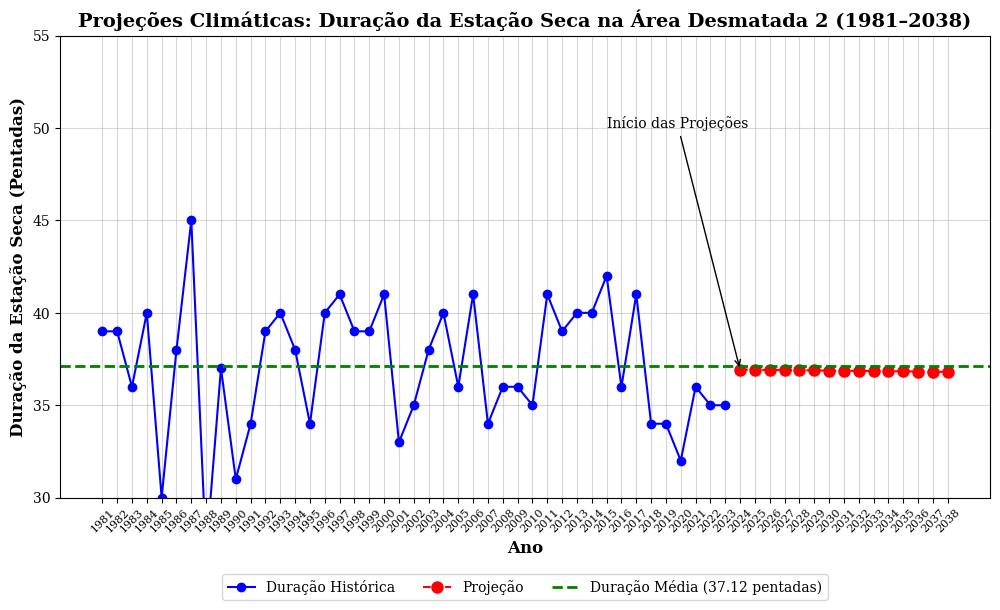

In [29]:
# Imprimir os valores da projeção
print("Valores projetados da duração da estação seca:")
for ano, duracao in zip(projecao_df["Ano"], projecao_df["Duração_Seca_Projetada"]):
    print(f"Ano: {ano}, Duração projetada: {duracao:.2f} pentadas")

# Ajustar os dados do gráfico para refinar a estética
plt.figure(figsize=(12, 6))

# Dados históricos
plt.plot(season_df["Ano"], season_df["Duração_Seca"], marker="o", label="Duração Histórica", color="blue")

# Projeções
plt.plot(projecao_df["Ano"], projecao_df["Duração_Seca_Projetada"], marker="o", markersize=8, linestyle="--", label="Projeção", color="red")

# Linha horizontal para a média histórica
plt.axhline(mean_duration, color='green', linestyle='--', linewidth=2, label=f"Duração Média ({mean_duration:.2f} pentadas)")

# Ajustar o eixo X para mostrar todos os anos
plt.xticks(ticks=season_df["Ano"].tolist() + projecao_df["Ano"].tolist(), rotation=45, fontsize=8)

# Ajuste de escala do eixo Y
plt.ylim(30, 55)

# Configurações do gráfico
plt.title("Projeções Climáticas: Duração da Estação Seca na Área Desmatada 2 (1981–2038)", fontweight="bold", fontsize=14)
plt.xlabel("Ano", fontsize=12, fontweight="bold")
plt.ylabel("Duração da Estação Seca (Pentadas)", fontsize=12, fontweight="bold")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(alpha=0.5)

# Anotação para destacar início das projeções
plt.annotate("Início das Projeções", xy=(2024, projecoes[0]), xytext=(2015, 50),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)

# Salvar e exibir o gráfico
plt.savefig(output_path_projection, format="pdf")
plt.show()


Valores projetados da duração da estação seca:
Ano: 2024, Duração projetada: 36.93 pentadas
Ano: 2025, Duração projetada: 36.92 pentadas
Ano: 2026, Duração projetada: 36.91 pentadas
Ano: 2027, Duração projetada: 36.90 pentadas
Ano: 2028, Duração projetada: 36.89 pentadas
Ano: 2029, Duração projetada: 36.88 pentadas
Ano: 2030, Duração projetada: 36.88 pentadas
Ano: 2031, Duração projetada: 36.87 pentadas
Ano: 2032, Duração projetada: 36.86 pentadas
Ano: 2033, Duração projetada: 36.85 pentadas
Ano: 2034, Duração projetada: 36.84 pentadas
Ano: 2035, Duração projetada: 36.83 pentadas
Ano: 2036, Duração projetada: 36.82 pentadas
Ano: 2037, Duração projetada: 36.82 pentadas
Ano: 2038, Duração projetada: 36.81 pentadas


NameError: name 'mean_duration' is not defined

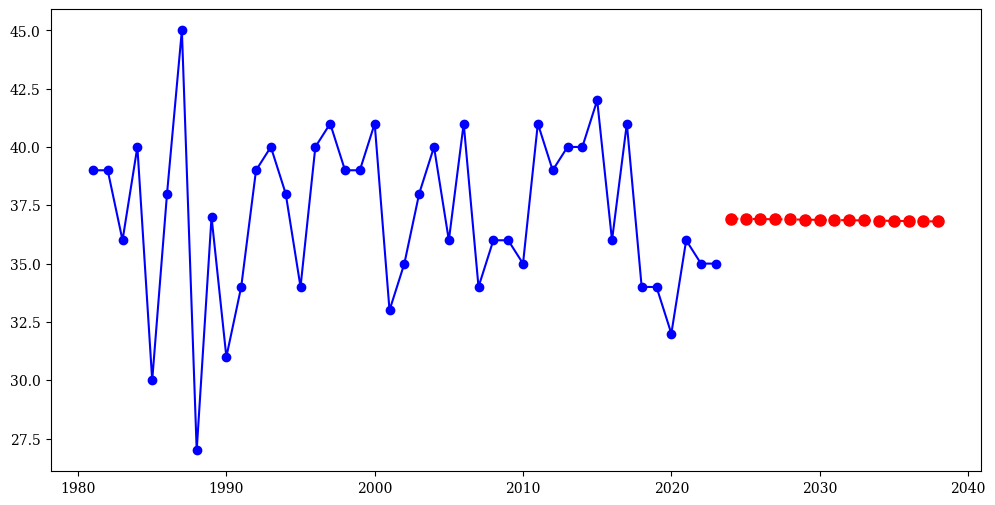

In [25]:
# Imprimir os valores da projeção
print("Valores projetados da duração da estação seca:")
for ano, duracao in zip(projecao_df["Ano"], projecao_df["Duração_Seca_Projetada"]):
    print(f"Ano: {ano}, Duração projetada: {duracao:.2f} pentadas")

# Ajustar os dados do gráfico para refinar a estética
plt.figure(figsize=(12, 6))

# Dados históricos
plt.plot(season_df["Ano"], season_df["Duração_Seca"], marker="o", label="Duração Histórica", color="blue")

# Projeções
plt.plot(projecao_df["Ano"], projecao_df["Duração_Seca_Projetada"], marker="o", markersize=8, linestyle="--", label="Projeção", color="red")

# Linha horizontal para a média histórica
plt.axhline(mean_duration, color='green', linestyle='--', linewidth=2, label=f"Duração Média ({mean_duration:.2f} pentadas)")

# Ajustar o eixo X para mostrar todos os anos
plt.xticks(ticks=season_df["Ano"].tolist() + projecao_df["Ano"].tolist(), rotation=45, fontsize=8)

# Ajuste de escala do eixo Y
plt.ylim(30, 55)

# Configurações do gráfico
plt.title("Projeções Climáticas: Duração da Estação Seca na Área Desmatada 3 (1981–2038)", fontweight="bold", fontsize=14)
plt.xlabel("Ano", fontsize=12, fontweight="bold")
plt.ylabel("Duração da Estação Seca (Pentadas)", fontsize=12, fontweight="bold")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(alpha=0.5)

# Anotação para destacar início das projeções
plt.annotate("Início das Projeções", xy=(2024, projecoes[0]), xytext=(2015, 50),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)

# Salvar e exibir o gráfico
plt.savefig(output_path_projection, format="pdf")
plt.show()
